In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import os
import rospy
from itertools import count
from time import sleep, time
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

from skimage import io, color, img_as_float, img_as_ubyte, img_as_bool

from dsuite.utils import kinect_image_service
from softlearning.environments.utils import get_environment

/home/hartikainen/conda/envs/softlearning/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.1) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
W0702 11:06:07.941406 140521423927040 deprecation_wrapper.py:118] From /home/hartikainen/conda/envs/softlearning/lib/python3.7/site-packages/tensorflow_estimator/python/estimator/api/_v1/estimator/__init__.py:10: The name tf.estimator.inputs is deprecated. Please use tf.compat.v1.estimator.inputs instead.



In [2]:
# print("image_service1")
# image_service1 = kinect_image_service.KinectImageService(topic="/kinect2_001144463747/hd/image_color")
# print("image_service2")
# image_service2 = kinect_image_service.KinectImageService(topic="/kinect2_001161563647/hd/image_color")
# print("image_service1")
# image_service1 = logitech_image_service.LogitechImageService(topic="/front_1/image_raw")

# print("image_service2")
# image_service2 = logitech_image_service.LogitechImageService(topic="/front_2/image_raw")

print("image_service1")
image_service1 = kinect_image_service.KinectImageService(topic="/kinect2_001144463747/qhd/image_color")
# print("image_service2")
# image_service2 = kinect_image_service.KinectImageService(topic="/kinect2_001161563647/hd/image_color")

image_service1
subscribing to:  /kinect2_001144463747/qhd/image_color
No image found yet.


/home/hartikainen/conda/envs/softlearning/lib/python3.7/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


<IPython.core.display.Javascript object>


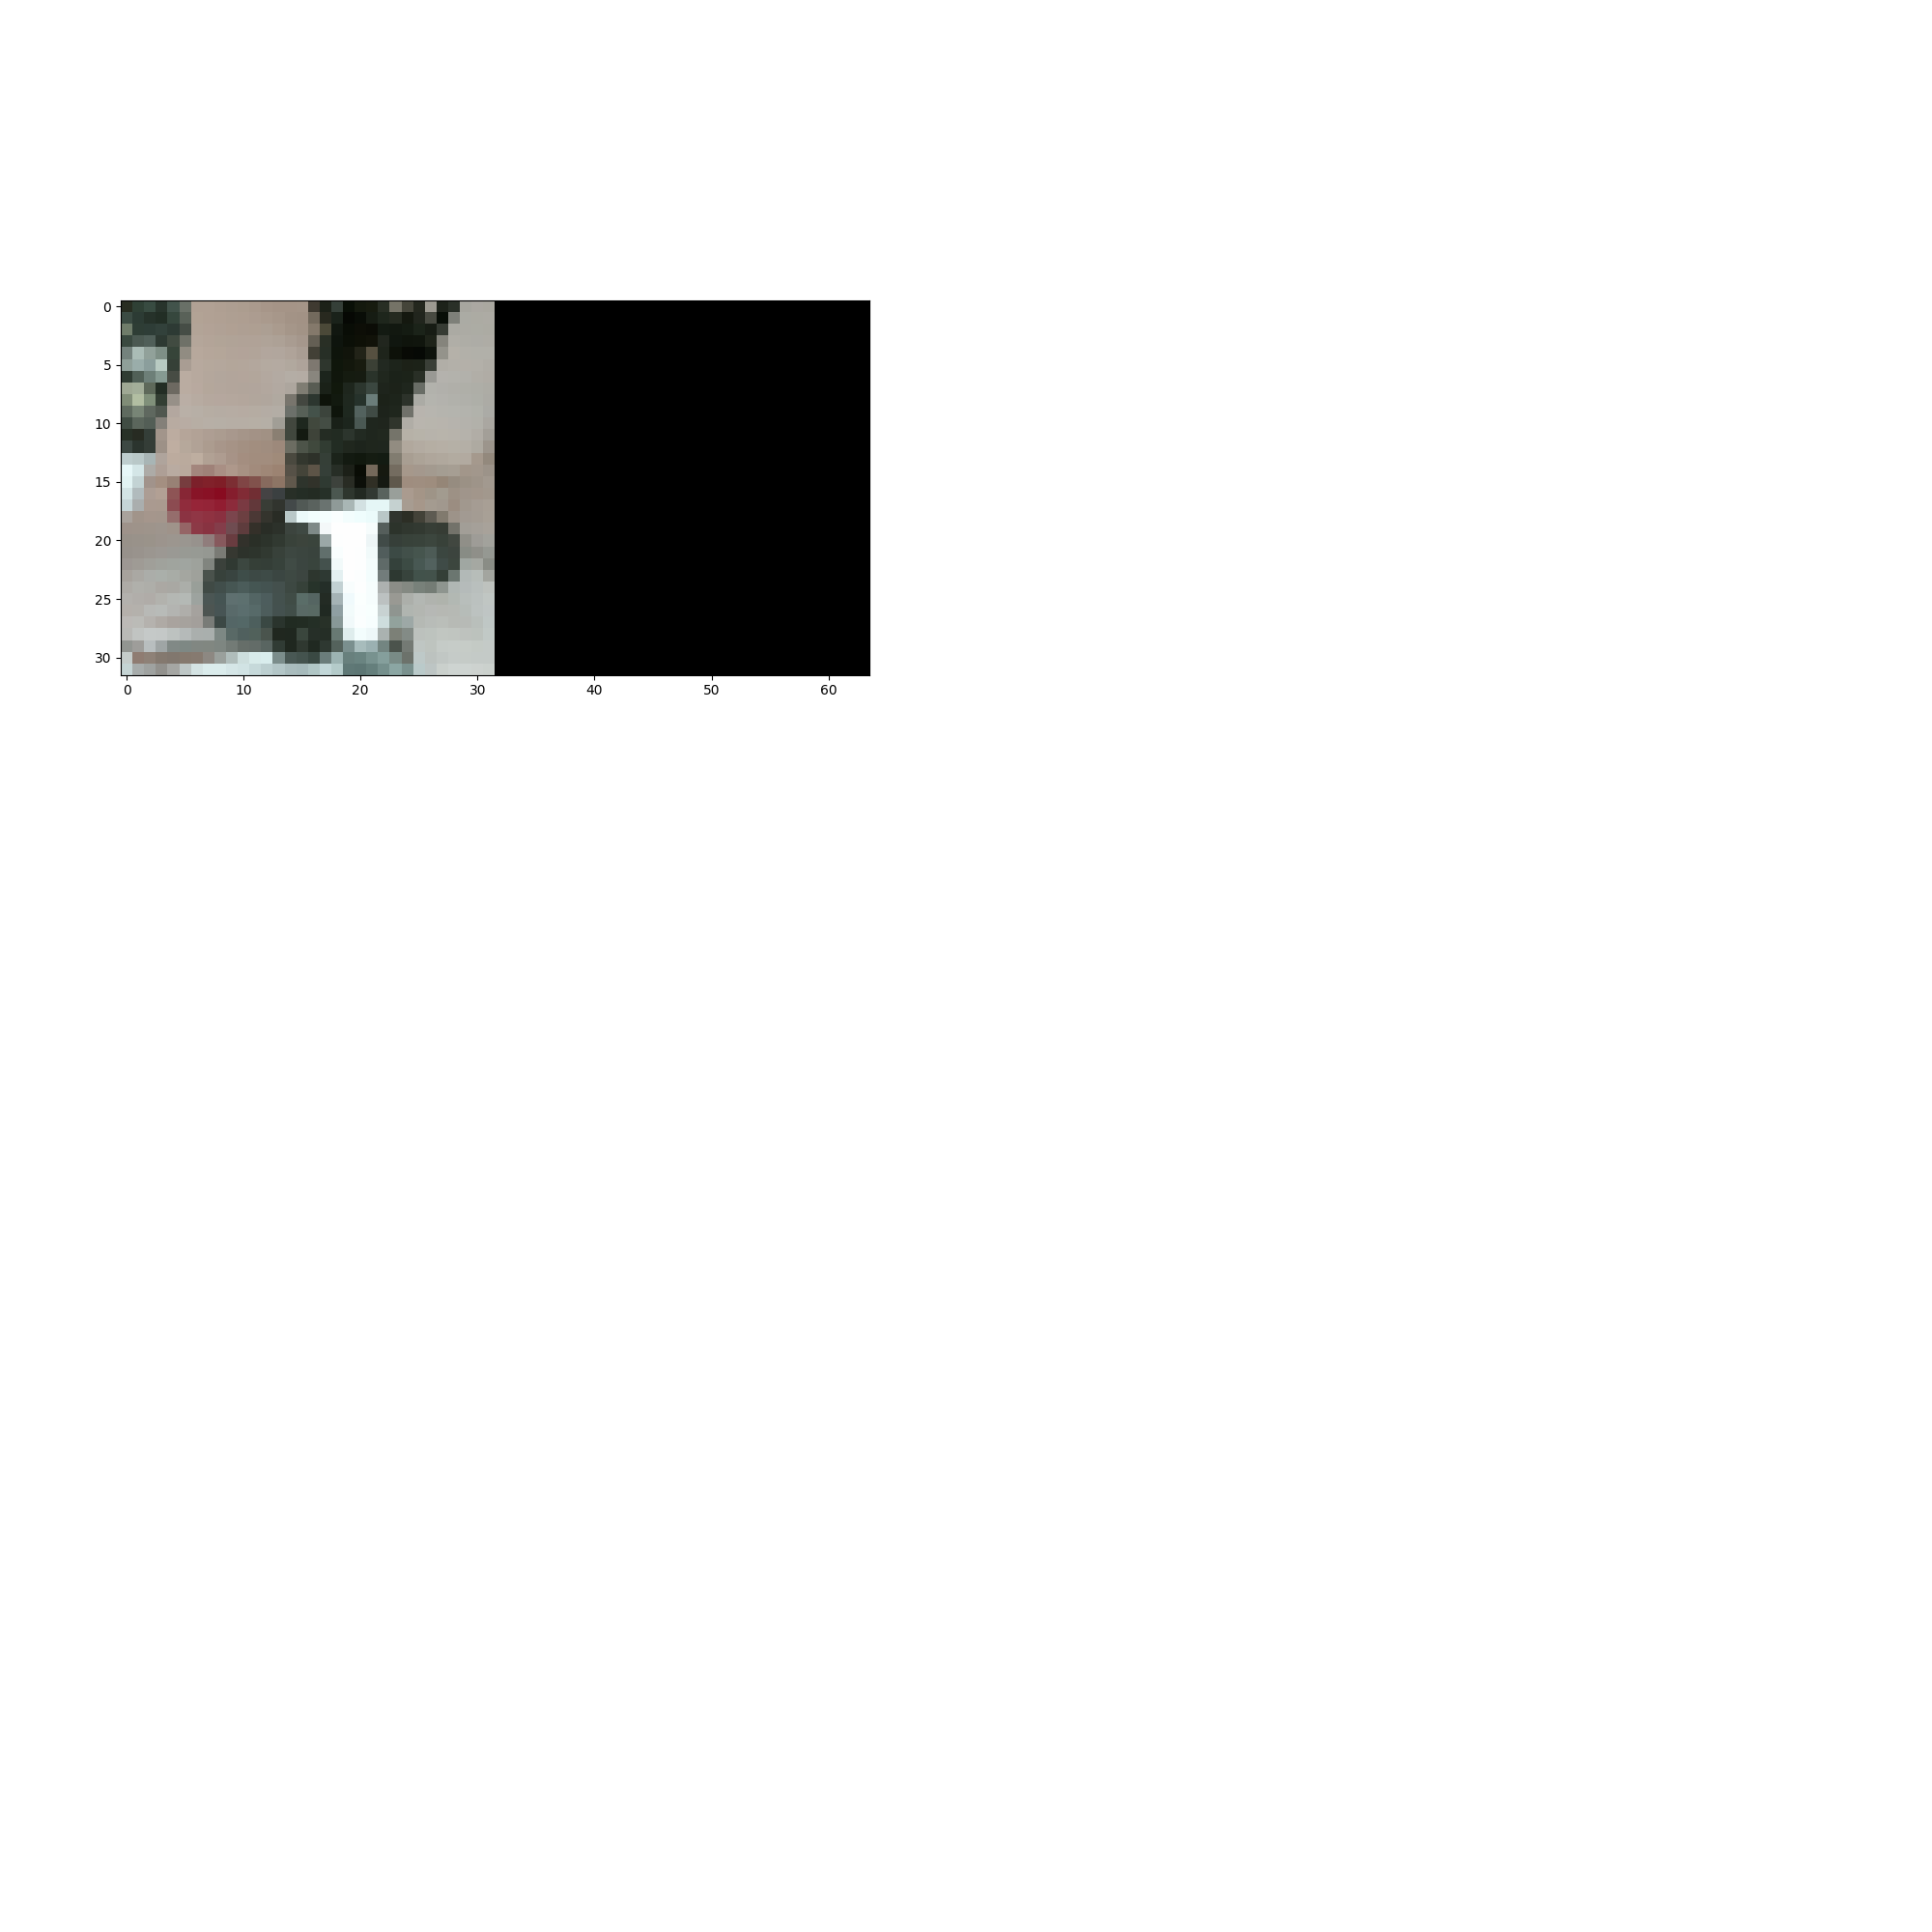

KeyboardInterrupt: 

In [3]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
plt.show()
for i in range(10000):
    plt.clf()
    plt.cla()
    # image1 = image_service1.get_image()
    try:
        image1 = image_service1.get_image()
    except Exception as e:
        image1 = np.zeros((32, 32, 3), dtype=np.uint8)
    try:
        image2 = image_service2.get_image()
    except Exception as e:
        image2 = np.zeros_like(image1)
    # print(image2.dtype)
    plt.imshow(np.concatenate((image1, image2), axis=1))
    # plt.imshow(image1)
    fig.canvas.draw()
    ax.set_title(i)
    # sleep(0.01)

In [ ]:
# fig = plt.figure(figsize=(10, 10))
# ax = fig.gca()
# plt.show()
# for i in range(1000):
#     plt.clf()
#     plt.cla()
#     image = environment.get_pixels()
#     original_image = image.copy()
#     # image[..., [1,2]] = 0
#     # image = img_as_float(image)
#     # image = 1.0 - np.abs(image - (1.0, 0, 0))
#     # image = color.rgb2gray(image)
#     # image = image > 0.7
#     # image = color.gray2rgb(image)
#     # image = img_as_ubyte(image)
#     # image = np.array(request().image, dtype=np.int).reshape(1080, 1920, 3)
#     # image = image[200:850, 600:1250]
#     # plt.imshow(np.concatenate((original_image, image), axis=1))
#     plt.imshow(image)
#     fig.canvas.draw()
#     ax.set_title(i)
#     sleep(1)

In [ ]:
# environment = get_environment('gym', 'DClaw3', 'ImageScrewV2-v0', {
# # environment = get_environment('gym', 'HardwareDClaw3', 'ImageScrewV2-v0', {
#     'hand_position_cost_coeff': 0,
#     'hand_velocity_cost_coeff': 0,
#     'hand_acceleration_cost_coeff': 0,
#     'target_initial_velocity_range': (0, 0),
#     'target_initial_position_range': (1.5 * np.pi, 1.5 * np.pi),
#     'object_initial_velocity_range': (0, 0),
#     'object_initial_position_range': (0.5 * np.pi, 0.5 * np.pi),
#     'pixel_wrapper_kwargs': {
#         'observation_key': 'pixels',
#         'pixels_only': False,
#         'render_kwargs': {
#             'width': 32,
#             'height': 32,
#             'camera_id': -1
#         },
#     },
#     'observation_keys': (
#         'pixels',

#         'hand_position',
#         'hand_velocity',
#         'hand_acceleration',

#         # These are supposed to not be fed to the models,
#         # but they are here just for the reward computation
#         # when we set the goal from outside of the environment.
#         'object_position',
#         'object_position_sin',
#         'object_position_cos',
#         'object_velocity',

#         'desired_hand_position',
#         'desired_hand_velocity',
#         'desired_pixels',
#     ),
#     'goal_key_map': {
#         f'desired_{key}': key
#         for key in (
#             'hand_position',
#             'hand_velocity',
#             'pixels',
#         )
#     },
# })